# Réseaux neuronaux

<img src="images/mnist-examples.png"/>

Quelques guides:
- keras https://keras.io/getting_started/intro_to_keras_for_engineers/
- keras https://www.tensorflow.org/tutorials/quickstart/beginner
- (tf2) https://becominghuman.ai/image-classification-with-tensorflow-2-0-without-keras-e6534adddab2
- (tf1) https://github.com/neodelphis/tensorflow-without-a-phd-french/blob/master/mnist_03_softmax.ipynb

## Softmax

Créer et mesurer les résultats d'un réseau neuronal simple couche complètement connecté avec softmax comme fonction d'activation

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical

Récupération des données sous forme de tableaux numpy

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Dimension de l'ensemble d'entraînement des images:
x_train.shape

(60000, 28, 28)

In [4]:
# Dimension de l'ensemble d'entraînement des étiquettes:
y_test.shape

(10000,)

Travail préparatoire sur les données d'entrée

In [5]:
# 1-hot encoding
y_train, y_test = to_categorical(y_train, dtype='int8'), to_categorical(y_test, dtype='int8')

Définition de l'architecture du réseau de neurones : modèle simple couche complètement connecté avec softmax comme fonction d'activation

In [6]:
from tensorflow.keras import Input, layers, Model

In [7]:
x_in = Input(shape=(28, 28), name="entree")
x = layers.Flatten(name="vectorisation")(x_in)
y_out = layers.Dense(10, activation="softmax", use_bias=False, name="dense")(x)
model = Model(x_in, y_out, name="mono_couche_softmax")
model.summary()

Model: "mono_couche_softmax"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
entree (InputLayer)          [(None, 28, 28)]          0         
_________________________________________________________________
vectorisation (Flatten)      (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7840      
Total params: 7,840
Trainable params: 7,840
Non-trainable params: 0
_________________________________________________________________


Choix de la fonction de coût, de la stratégie d'optimisation et des mesures

In [8]:
# Compile the model
model.compile(
    optimizer="sgd",
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)

Entraînement du modèle

In [9]:
batch_size = 64
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/sample - loss: 237.4762 - categorical_accuracy: 0.8389
Epoch 2/5
60000/60000 [==============================] - 2s 36us/sample - loss: 176.7367 - categorical_accuracy: 0.8659
Epoch 3/5
60000/60000 [==============================] - 2s 37us/sample - loss: 165.6558 - categorical_accuracy: 0.8720
Epoch 4/5
60000/60000 [==============================] - 2s 37us/sample - loss: 164.9828 - categorical_accuracy: 0.8738
Epoch 5/5
60000/60000 [==============================] - 2s 37us/sample - loss: 152.6788 - categorical_accuracy: 0.8787


Evaluation sur l'ensemble de test

In [10]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 1s - loss: 204.7544 - categorical_accuracy: 0.8563


[185.3333717450738, 0.8563]

### Visualisation de l'évolution de l'apprentissage

In [11]:
history.history

{'loss': [237.47621997172038,
  176.7366985555013,
  165.65580807698566,
  164.98280666300457,
  152.67884307250978],
 'categorical_accuracy': [0.83888334,
  0.8659,
  0.87198335,
  0.87381667,
  0.87866664]}

In [12]:
from matplotlib import pyplot as plt

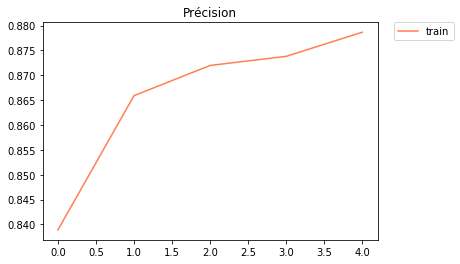

In [14]:
# Précision
plt.plot(history.history['categorical_accuracy'], c='coral', label='train')
plt.title('Précision')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

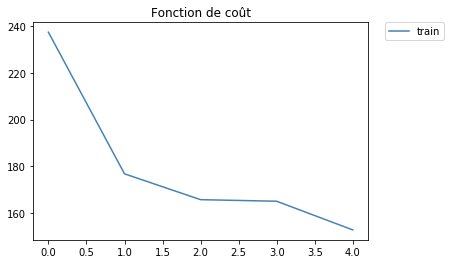

In [15]:
# Fonction de coût : Entropie croisée moyenne
plt.plot(history.history['loss'], c='steelblue', label='train')
plt.title('Fonction de coût')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

## Manipulations

Pour chacune des quetions suivantes, faire des tests avec différentes valeurs pour essayer de trouver la plus optimisée.
- Où se trouve le taux d'apprentissage, comment le modifier.
- A-t-on besoin de normalisation?
- Quelle est l'influence de la taille du batch?
- Quel est le nombre d'époques optimal pour l'apprentissage?

Comment faire une courbe qui représente l'évolution de la fonction de coût (loss) et la précision lors de l'apprentissage?

Extraire de x_test une centaine de valeurs et appliquer le réseau sur ces valeurs. Trouver quelques exemples où ça ne marche pas, donner la véritable étiquette et celle proposée ainsi qu'une visualisation de l'image correspondante. Est ce que l'erreur vous semble logique?

## Sigmoïde

Créer et mesurer les résultats d'un réseau neuronal complètement connecté:
- première couche 100 neurones avec sigmoïde comme fonction d'activation
- deuxième couche de 10 neurones avec softmax comme fonction d'activation

In [16]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# normalisation
#x_train, x_test = x_train/255., x_test/255.
# 1-hot encoding
y_train, y_test = to_categorical(y_train, dtype='int8'), to_categorical(y_test, dtype='int8')

In [17]:
inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(100, activation="sigmoid")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs, name="couche_sigmoid")
model.summary()

Model: "couche_sigmoid"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [18]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1) 


model.compile(
    optimizer=opt,
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.CategoricalAccuracy(name="acc")],
)

In [19]:
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=10)

Fit on NumPy data
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.7666 - acc: 0.7903
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5403 - acc: 0.8455
Epoch 3/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.5301 - acc: 0.8426
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.5019 - acc: 0.8485
Epoch 5/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5170 - acc: 0.8418
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5025 - acc: 0.8465
Epoch 7/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.4848 - acc: 0.8522
Epoch 8/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4682 - acc: 0.8586
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4951 - acc: 0.8493
Epoch 10/10
60000/60000 [================

In [20]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 1s - loss: 0.4528 - acc: 0.8544


[0.4905675558567047, 0.8544]

## ReLu - Adam

In [21]:
inputs = tf.keras.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(100, activation="sigmoid")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs, name="couche_relu")


model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["categorical_accuracy"],
)
batch_size = 64
print("Fit on NumPy data")
model.fit(x_train, y_train, batch_size=batch_size, epochs=10)
model.evaluate(x_test,  y_test, verbose=2)

Fit on NumPy data
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5942 - categorical_accuracy: 0.8422
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3502 - categorical_accuracy: 0.8999
Epoch 3/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3090 - categorical_accuracy: 0.9109
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2920 - categorical_accuracy: 0.9135
Epoch 5/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2737 - categorical_accuracy: 0.9196
Epoch 6/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2728 - categorical_accuracy: 0.9192
Epoch 7/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2500 - categorical_accuracy: 0.9258
Epoch 8/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2486 - categorical_accuracy: 0.9261
Epoch 9

[0.23978750163018703, 0.9274]